# 算法实现-决策树

### 载入数据

In [35]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

读入经过预处理的数据

In [36]:
train_path = "data/train_data_v1.csv"
train_data = pd.read_csv(train_path,sep=" ")
test_path = "data/test_data_v1.csv"
test_data = pd.read_csv(test_path,sep=" ")

### 特征构造

选择训练数据

In [37]:
data = train_data.copy(deep=True)

计算使用时间

In [38]:
data['used_time'] = (pd.to_datetime(data['creatDates'], format='%Y-%m-%d', errors='coerce') - 
                            pd.to_datetime(data['regDates'], format='%Y-%m-%d', errors='coerce')).dt.days

选择作为特征的属性

In [39]:
train = data[["bodyType","brand","fuelType","gearbox","kilometer",
              'model', 'notRepairedDamage', 'power', 'regDate',
              'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
               'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 
              'name_count','used_time']]
label = data["price"]
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2)

### 训练模型

In [40]:
dr = tree.DecisionTreeRegressor()
dr.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 模型评价

对预测结果计算出的决定系数R^2

In [41]:
print(dr.score(x_test,y_test))

0.9242015937964156


可视化预测误差

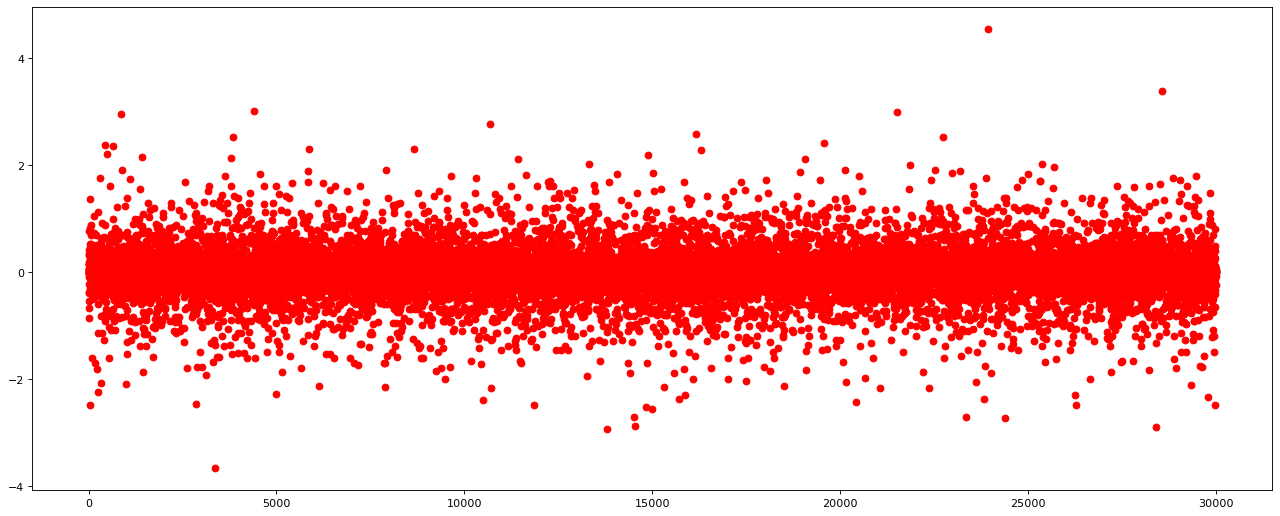

In [42]:
p_test = dr.predict(x_test)
t = [t for t in range(0,len(p_test))]
plt.figure(figsize=(20,8),dpi=80)
plt.scatter(t,p_test - y_test,label="2",color="red")

MAE(Mean Absolute Error)标准评价

In [43]:
print(mean_absolute_error(p_test, y_test))

0.18419533737341043


### 使用回归模型预测data/test_data_v1.csv中的数据

In [44]:
test_data['used_time'] = (pd.to_datetime(test_data['creatDates'], format='%Y-%m-%d', errors='coerce') - 
                            pd.to_datetime(test_data['regDates'], format='%Y-%m-%d', errors='coerce')).dt.days
test_data_features = test_data[["bodyType","brand","fuelType","gearbox","kilometer",
              'model', 'notRepairedDamage', 'power', 'regDate',
              'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
               'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 
              'name_count','used_time']]
#test_data_features
price = dr.predict(test_data_features)
price
output = pd.DataFrame()
output['SaleID'] = test_data.SaleID
output['price'] = price
output.to_csv('output/algo2_predict.csv',index=False)

In [45]:
output

,SaleID,price
0,200000,7.131699
1,200001,7.600902
2,200002,9.127067
3,200003,6.685861
4,200004,7.601236
...,...,...
49995,249995,8.794976
49996,249996,9.769442
49997,249997,8.639588
49998,249998,8.455424
